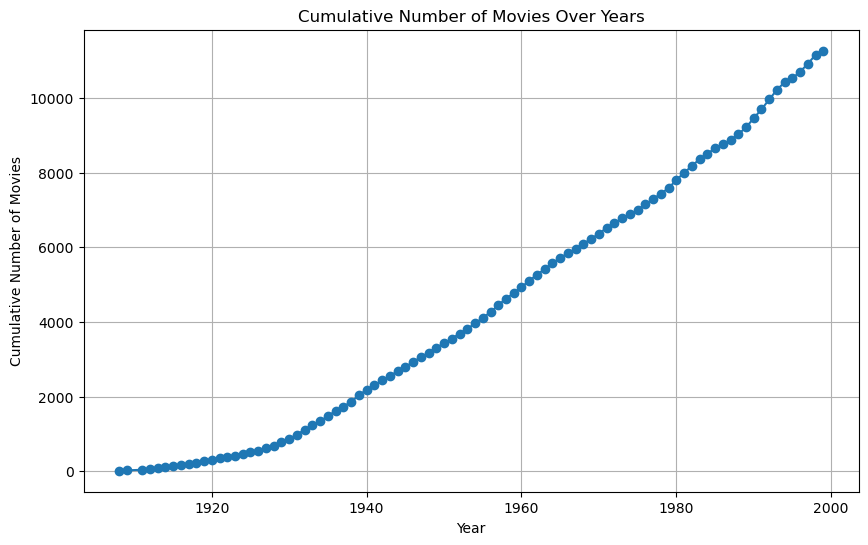

In [6]:
import matplotlib.pyplot as plt

# Read data from file
data = []
with open('numMoviesPerYear.txt', 'r') as f:
    for line in f:
        if line.strip():  # Ignore empty lines
            num_movies, year = map(int, line.split())
            data.append((year, num_movies))

# Sort data by year
data.sort(key=lambda x: x[0])

# Calculate cumulative sum of number of movies
cumulative_movies = [0]
for year, num_movies in data:
    cumulative_movies.append(cumulative_movies[-1] + num_movies)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in data], cumulative_movies[1:], marker='o', linestyle='-')
plt.title('Cumulative Number of Movies Over Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Movies')
plt.grid(True)
plt.show()
